# 6 统计分析子模块 —— [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

- 子模块 scipy.stats 仍在发展中

- scipy.stats 子模块包含

    - 统计分析工具
    - 随机过程的概率描述

- 注意

    - 不同随机过程的随机数生成器，见 numpy.random

#### 导入基本模块

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sp

#### 导入 stats 子模块

In [3]:
from scipy import stats

## 6.1 引言

- scipy.stats 中的随机分布主要有两类

    - 连续型随机变量分布 —— 已在 stats 子模块中实现 80+ 个
    - 离散型随机变量分布 —— 已在 stats 子模块中实现 10+ 个

### 6.1.1 已实现的 RVs 数

In [ ]:
dist_continu = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
print('连续随机变量数目: %d' % len(dist_continu))

In [ ]:
dist_discrete = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_discrete)]
print('离散随机变量数目: %d' % len(dist_discrete))

### 6.1.2 查询

```python
>>> numpy.info(scipy.stats)
```

In [4]:
np.info(sp.stats)

Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
   dweibull          -- Double

## 6.2 连续型随机变量 RV

#### 导入 stats 子模块中的对象

- 此处为 norm

In [5]:
from scipy.stats import norm

#### 获得关于 stats.norm 对象的帮助

- 调用
    - ```np.info(sp.stats.norm)```
    

- norm 正态连续 RV


- 关键字
    - location (loc) —— 均值 mean
    - scale (scale) —— 标准差
    
    
- 常用方法
    - rvs(loc=0, scale=1, size=1, random_state=None)，随机变量（Random variates）
    - pdf(x, loc=0, scale=1)，概率密度函数（Probability density function）
    - logpdf(x, loc=0, scale=1)，概率密度函数的对数
    - cdf(x, loc=0, scale=1)，累积分布函数（Cumulative distribution function）
    - sf(x, loc=0, scale=1)，剩余函数、残余函数（Survival function），1-cdf
    - ppf(q, loc=0, scale=1)，百分点函数（Percent point function，cdf的逆）
    - isf(q, loc=0, scale=1)，剩余函数的逆（inverse of ``sf``）
    - moment(n, loc=0, scale=1)，$n$ 阶非中心矩
    - stats(loc=0, scale=1, moments='mv')，均值('m')、方差('v')、偏度skew('s') 和/或 峰度kurtosis('k')
    - expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds)， 函数的期望值
    - median(loc=0, scale=1)，分布中值
    - mean(loc=0, scale=1)，均值
    - var(loc=0, scale=1)，方差
    - std(loc=0, scale=1)，标准差  

In [6]:
np.info(sp.stats.norm)

A normal continuous random variable.

The location (loc) keyword specifies the mean.
The scale (scale) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, loc=0, scale=1)
    Log of the survival function.
ppf(q, loc=0, scale=1)
    Percent point function (inverse of ``cdf`` --- percentiles).
isf(q, loc=0, scale=1)
    Inve

#### 查询自变量区间

- 调用

```python
>>> print('区间下限: %s, 上限: %s' % (norm.a, norm.b))
```

In [7]:
print('区间下限: %s, 上限: %s' % (norm.a, norm.b))

区间下限: -inf, 上限: inf


### 6.2.1 正态分布 —— 统计矩

- 均值

$$\mu=E\left[X\right]$$

- 方差

$$\sigma^2 = E\left[(X-\mu)^2\right]$$

- 偏度

$$Skew(X) = E\left[\left(\dfrac{X-\mu}{\sigma}\right)^3\right]$$

- 峰度

$$Kurt(X) = E\left[\left(\dfrac{X-\mu}{\sigma}\right)^4\right]$$

In [8]:
mu, sigma = 5, 3

mean, var, skew, kurt = norm(mu,sigma).stats(moments='mvsk') # 获得统计信息：矩
print("均值：{0}\n方差：{1}\n偏度：{2}\n峰度：{3}".format(mean, var, skew, kurt))

均值：5.0
方差：9.0
偏度：0.0
峰度：0.0


### 6.2.2 正态分布 —— 概率曲线图

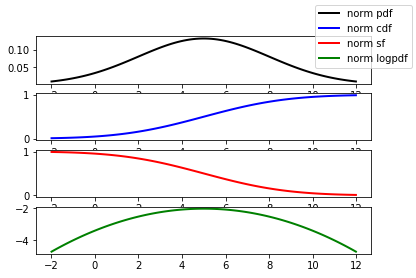

In [9]:
mu, sigma = 5, 3             # 均值、标准差
rv = norm(mu,sigma)          # 正态分布 RV

#x = np.linspace(mu-3*sigma, mu+3*sigma, 100)

x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)

fig, ax = plt.subplots(4, 1)

ax[0].plot(x, rv.pdf(x),    'k-', lw=2, label='norm pdf')
ax[1].plot(x, rv.cdf(x),    'b-', lw=2, label='norm cdf')
ax[2].plot(x, rv.sf(x),     'r-', lw=2, label='norm sf')
ax[3].plot(x, rv.logpdf(x), 'g-', lw=2, label='norm logpdf')

fig.legend()

### 6.2.3 正态分布 —— 样本直方图

D:\Anaconda3\envs\Python37Env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


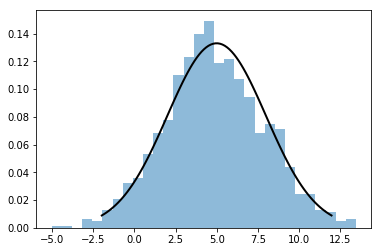

In [10]:
r = rv.rvs(size=1000)    # 1000 个随机样本值

plt.hist(r, bins=30, normed=True, histtype='stepfilled', alpha=0.5)
plt.plot(x, rv.pdf(x),'k-', lw=2)

### 6.2.4 概率函数计算

#### (1) 累积分布函数

In [11]:
norm.cdf(0) # 0点处的累积分布概率

0.5

In [12]:
mu, sig = rv.mean(), rv.std()

x    = np.linspace(mu-3*sig, mu+3*sig, 7)
prob = rv.cdf(x)

print("mean = {0}, std = {1}".format(mu, sig))
print("x    = {0}".format(x))
print("prob = {0}".format(prob))

mean = 5.0, std = 3.0
x    = [-4. -1.  2.  5.  8. 11. 14.]
prob = [0.0013499  0.02275013 0.15865525 0.5        0.84134475 0.97724987
 0.9986501 ]


#### (2) 生成样本序列

```python
rv.rvs(size=(3,4))
```

In [13]:
np.random.seed(201812)  # 随机种子
rv.rvs(size=(3,4))

array([[ 3.45221486,  6.57007387,  2.91722679,  4.3892872 ],
       [ 6.24102479,  2.97552573,  6.52877078,  3.45711547],
       [13.29585857,  7.68472452,  6.31274132,  6.06130729]])

In [14]:
rv.rvs(size=(3,4), random_state=201812) # 与上等价的方式

array([[ 3.45221486,  6.57007387,  2.91722679,  4.3892872 ],
       [ 6.24102479,  2.97552573,  6.52877078,  3.45711547],
       [13.29585857,  7.68472452,  6.31274132,  6.06130729]])

### 6.2.5 随机变量平移与伸缩（Shifting and Scaling）变换

设有随机变量 $X$

- 平移变换的意思就是给 $X$ 加上一个常数 ``loc``
- 伸缩变换的意思是给 $X$ 乘以一个常数 ``scale``

$$Y = \dfrac{X-loc}{scale}$$

平移与伸缩的性质


- 平移不改变方差
- 伸缩会改变方差

In [15]:
norm.stats(loc=3, scale=4, moments="mv")

(array(3.), array(16.))

#### 示例 1 —— 指数分布随机变量 $X\sim E(\mu, \lambda)$


- 累积分布函数 ``cdf``

$$cdf(x) = 
\left\{
\begin{array}{ll}
1-e^{-\lambda (x-\mu)}, & x\ge \mu\\
0, & x<\mu
\end{array}
\right.
$$


- 概率密度函数 ``pdf``
$$pdf(x) = 
\left\{
\begin{array}{ll}
\lambda e^{-\lambda (x-\mu)}, & x\ge \mu\\
0, & x<\mu
\end{array}
\right.
$$


- 缺省参数

$$loc = \mu = 0,\quad scale = \dfrac{1}{\lambda} = 1$$

In [16]:
rv_std = sp.stats.expon()               # 缺省
rv_ss  = sp.stats.expon(loc=2, scale=3) # 平移到 2， 伸缩率 3

print(rv_std.mean(), rv_std.std())
print(rv_ss.mean(), rv_ss.std())

1.0 1.0
5.0 3.0


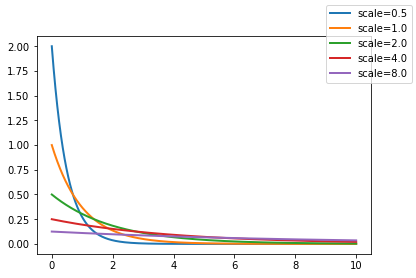

In [17]:
scale_array = np.array([0.5, 1, 2, 4, 8])

x = np.linspace(0, 10, 1000)

fig = plt.figure()
ax  = plt.axes()

for scale in scale_array:
    rv = sp.stats.expon(scale=scale)
    ax.plot(x, rv.pdf(x), '-', lw=2, label='scale={0}'.format(scale))

fig.legend()

#### 示例 2 —— $(0, 1)$ 区间均匀分布

In [18]:
rv = sp.stats.uniform(loc=1,scale=4) # 随机变量

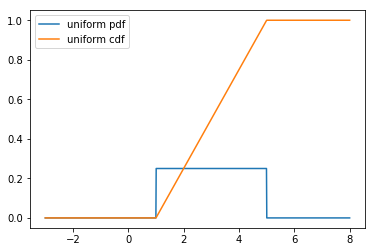

In [19]:
x = np.linspace(-3,8,1000)

plt.plot(x, rv.pdf(x), label="uniform pdf")
plt.plot(x, rv.cdf(x), label="uniform cdf")

plt.legend()

In [20]:
# 累积分布函数值
rv.cdf([0, 1, 2, 3, 4, 5])

array([0.  , 0.  , 0.25, 0.5 , 0.75, 1.  ])

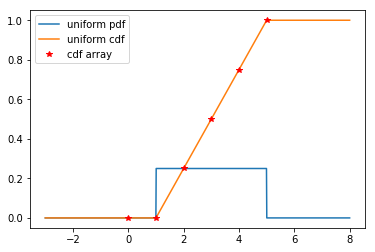

In [21]:
x = np.linspace(-3,8,1000)

plt.plot(x, rv.pdf(x), label="uniform pdf")
plt.plot(x, rv.cdf(x), label="uniform cdf")

xa = np.array([0, 1, 2, 3, 4, 5])
plt.plot(xa,rv.cdf(xa),"*r", label="cdf array")

plt.legend()

### 6.2.6 形状参数（Shape Parameters）

- 附加参数
- 用于描述随机分布的形状特征

####  示例 —— $\Gamma(\alpha,\beta)$ 分布的形状参数


- 概率密度函数 ``pdf``
$$\gamma(x, \alpha, \beta) = 
\left\{
\begin{array}{ll}
\dfrac{\beta^{\alpha}}{\Gamma(\alpha)}(x-c)^{\alpha-1}e^{-\beta(x-c)}, & x\ge c\\
0, & x<c
\end{array}
\right.
$$


- 形状参数 $\alpha$

- 伸缩参数 $sclae = \dfrac{1}{\lambda}$

In [ ]:
from scipy.stats import gamma
gamma.numargs

gamma.shapes

In [ ]:
x = np.linspace(0,10,100)

a_array = [1,2,3,4,5]

for a in a_array:
    rv = gamma(a=a)
    plt.plot(x, rv.pdf(x), label="shape parameter a={0}".format(a))
    
plt.legend()

### 6.2.7 广播法则


- 随机分布的基本函数方法遵守广播法则，如
    - pdf
    - cdf
    - sf
    - 等

#### 示例 —— $t(n)$ 分布利用广播法则计算逆剩余函数



- 概率密度函数 ``pdf``

$$p(x,n) = 
\dfrac{\Gamma\left(\dfrac{n+1}{2}\right)}
{\sqrt{n\pi}\,\,\Gamma\left(\dfrac{n}{2}\right)}
\left(1+\dfrac{x^2}{n}\right)^{-\dfrac{n+1}{2}}
$$


- 自由度参数 `df`$=n>1$ （正整数）

In [ ]:
# 计算 t 分布的 isf 函数值

rv10 = sp.stats.t(10)
print(rv10.isf([0.1, 0.05, 0.01]))

rv11 = sp.stats.t(11)
print(rv11.isf([0.1, 0.05, 0.01]))

In [ ]:
# 广播法则

stats.t.isf([0.1, 0.05, 0.01], [[10], [11]])

## 6.3 离散型随机变量 RV

### 6.3.1 与连续型随机变量的异同

#### 一般性

- 离散型随机变量的基本函数与连续型随机变量的几乎一致

#### 特殊性

- 概率质量函数 ``pmf`` —— 类似于连续型随机变量的 ``pdf``
- 没有拟合方法 ``fit``
- 伸缩因子 scale 不再是有效的关键字
- 平移参数 loc 仍然可用于平移分布


#### 其它

- 计算 ``cdf`` 的注意事项
    - 连续型 RV 的 cdf 一般是严格单调上升的函数，因此有逆函数
    - 离散型 RV 的 cdf 是不严格单调上升的阶梯函数，因此其逆函数有另外的定义
    
    $$ppf(q) = min\{x : cdf(x) >= q, x integer\}$$

### 6.3.2 示例 —— 超几何分布 $H(n,M,N)$

- 概率质量函数

$$P_H(\xi=x)
=\dfrac{
\left(
\begin{array}{c}
M-N\\
n-x
\end{array}
\right)
\left(
\begin{array}{c}
N\\
x
\end{array}
\right)}
{
\left(
\begin{array}{c}
M\\
n
\end{array}
\right)
},
\quad
x=\max\{0,n-M+N\},\cdots,\min\{n,N\}
$$

其中，$n,M,N$ 为正整数，满足

$$0\le N\le M,\quad 0\le n\le M$$

#### 超几何分布 ``cdf`` 求逆

In [ ]:
from scipy.stats import hypergeom
[M, n, N] = [20, 7, 12]

In [ ]:
x = np.arange(4)*2
x

In [ ]:
prb = hypergeom.cdf(x, M, n, N)
prb

In [ ]:
hypergeom.ppf(prb, M, n, N)

#### 似乎很准确，但是 $\cdots$

In [ ]:
hypergeom.ppf(prb + 1e-8, M, n, N)

In [ ]:
hypergeom.ppf(prb - 1e-8, M, n, N)

#### 小结

- 如果取的 ``cdf`` 数值不是离散样本点对应的分布概率，而是稍高一点，将返回下一个离散样本值

## 结束